# Ship Detection from Satellite Imagery Training

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
plt.style.use('bmh')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time 
import pandas as pd
import joblib
from sklearn.svm import SVC
from sklearn.decomposition import PCA

X = np.load('ships_dataset/ship_data.npy')
t = np.load('ships_dataset/ship_labels.npy')

label_names = ['no_ship', 'ship']

X.shape, t.shape

((4000, 80, 80, 3), (4000,))

## Training Classifiers (No Dimensionality Reduction)
Classifiers Selected:
- Logistic Regression 
- Soft Margin Support Vector Machine

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.2, random_state = 91)

X_train.shape

(3200, 80, 80, 3)

**Logistic Regression Model**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time 

X_flat = X_train.reshape(X_train.shape[0], -1)

log_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=200, n_jobs=-1))
])

log_param_grid = {
    'logreg__C': [0.01, 0.05],     
    'logreg__penalty': ['l2'],                
    'logreg__solver': ['sag']      
}

log_grid = GridSearchCV(log_pipe, log_param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
log_grid.fit(X_flat, t_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:35

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=200,
                                                           n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.05], 'logreg__penalty': ['l2'],
                         'logreg__solver': ['sag']},
             scoring='f1', verbose=1)

In [12]:
import pandas as pd

results = pd.DataFrame(log_grid.cv_results_)
print(f"Mean Training Time Per Model: {results['mean_fit_time'].mean():.2f} seconds")
print("Best params:", log_grid.best_params_)
print("Best F1 score:", log_grid.best_score_)

Mean Training Time Per Model: 63.15 seconds
Best params: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'sag'}
Best F1 score: 0.8328748689185056


In [13]:
import joblib

joblib.dump(log_grid.best_estimator_, 'logregModel.pkl');

**SVM Model**

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

X_flat = X_train.reshape(X_train.shape[0], -1)

svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

svm_param_grid = {
    'svm__C': [0.01, 0.05, 0.1],
    'svm__kernel': ['linear'] 
}

svm_grid = GridSearchCV(
    estimator=svm_pipe,
    param_grid=svm_param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

svm_grid.fit(X_flat, t_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.01, 0.05, 0.1],
                         'svm__kernel': ['linear']},
             scoring='f1', verbose=2)

In [15]:
results = pd.DataFrame(svm_grid.cv_results_)
print(f"Mean Training Time Per Model: {results['mean_fit_time'].mean():.2f} seconds")
print("Best params:", svm_grid.best_params_)
print("Best F1 score:", svm_grid.best_score_)

Mean Training Time Per Model: 17.95 seconds
Best params: {'svm__C': 0.05, 'svm__kernel': 'linear'}
Best F1 score: 0.8307951327448216


In [16]:
joblib.dump(svm_grid.best_estimator_, 'svmModel.pkl');

In [17]:
from sklearn.model_selection import cross_val_score

log_scores = cross_val_score(log_grid.best_estimator_, X_flat, t_train, cv=3, scoring='accuracy')
svm_scores = cross_val_score(svm_grid.best_estimator_, X_flat, t_train, cv=3, scoring='accuracy')

print("Logistic Regression Accuracy: {:.2f}% ± {:.2f}".format(log_scores.mean() * 100, log_scores.std() * 100))
print("SVM Accuracy: {:.2f}% ± {:.2f}".format(svm_scores.mean() * 100, svm_scores.std() * 100))

/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................svm__C=0.01, svm__kernel=linear; total time=  26.0s
[CV] END ....................svm__C=0.01, svm__kernel=linear; total time=  26.3s
[CV] END ....................svm__C=0.05, svm__kernel=linear; total time=  25.8s
[CV] END .....................svm__C=0.1, svm__kernel=linear; total time=  25.6s
[CV] END ....................svm__C=0.01, svm__kernel=linear; total time=  26.1s
[CV] END ....................svm__C=0.05, svm__kernel=linear; total time=  25.3s
[CV] END ....................svm__C=0.05, svm__kernel=linear; total time=  24.3s
[CV] END .....................svm__C=0.1, svm__kernel=linear; total time=  24.0s
[CV] END .....................svm__C=0.1, svm__kernel=linear; total time=  19.5s
Logistic Regression Accuracy: 90.66% ± 0.27
SVM Accuracy: 90.84% ± 0.69


| Model Type | Accuracy Score | F1 Score | Training Time |
|---|---|---|---|
| **Logistic Regression** | 0.9066 | 0.8329 | 63.15s  |
| **SVM** | 0.9084| 0.8308 | 17.95s |

## PCA Pipeline

In [3]:
from sklearn.decomposition import PCA
X_flat = X_train.reshape(X_train.shape[0], -1)

dim_red = Pipeline([('scaler', StandardScaler()),
                   ('pca', PCA(n_components=320))])

dim_red.fit(X_flat)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=320))])

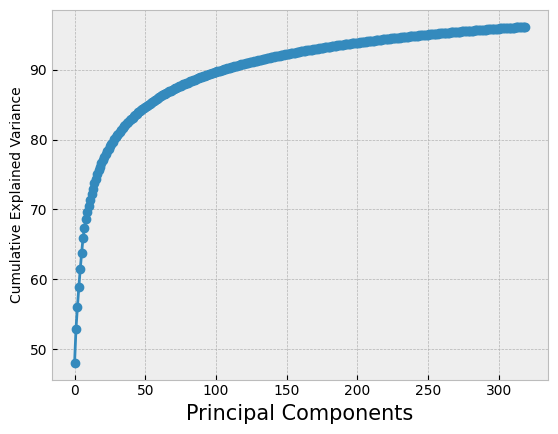

In [4]:
plt.plot(100*np.cumsum(dim_red.named_steps.pca.explained_variance_ratio_), '-o')
plt.xlabel('Principal Components',size=15)
plt.ylabel('Cumulative Explained Variance', size=10);

In [5]:
np.where(np.cumsum(dim_red.named_steps.pca.explained_variance_ratio_)>=0.9)[0]

array([106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
       210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
       249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
       262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 28

In [6]:
np.cumsum(dim_red.named_steps.pca.explained_variance_ratio_)[106]

0.9005857951305745

<u> As shown above, in order to explain 90% of the variance in the data, we need to preserve 107 principal components </u>

**Image Reconstructions**

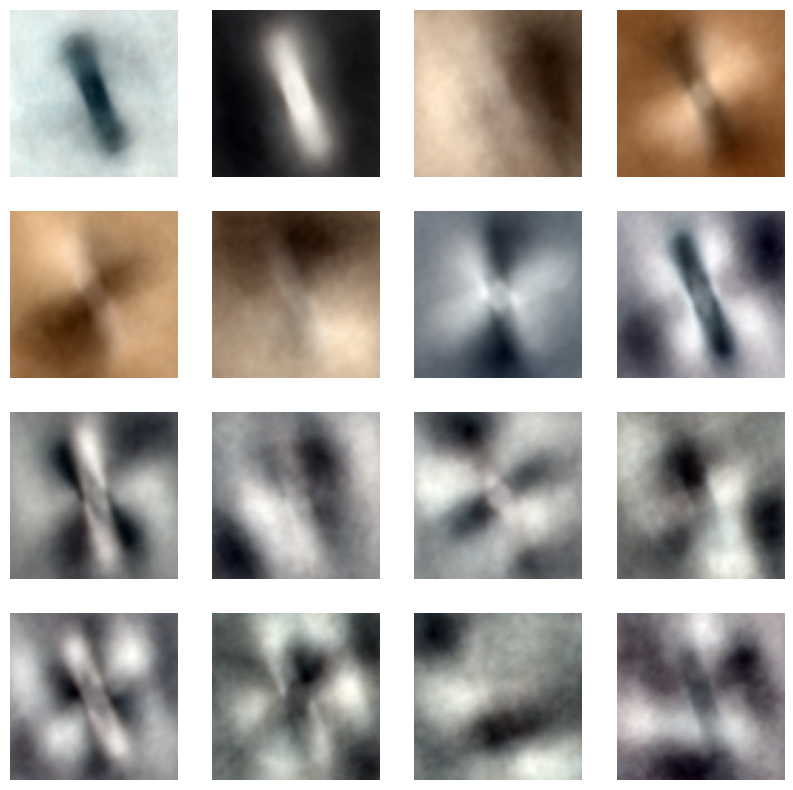

In [12]:
n_components = 107

dim_red = Pipeline([('scaler', StandardScaler()),
                   ('pca', PCA(n_components=n_components))])

X_proj = dim_red.fit_transform(X_flat)

fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    comp = dim_red.named_steps.pca.components_[i].reshape(80, 80, 3)
    comp = (comp - comp.min()) / (comp.max() - comp.min())
    plt.imshow(comp)
    plt.axis("off")

In [13]:
X_recon = dim_red.inverse_transform(X_proj)
rmse = np.sqrt(np.mean((X_flat - X_recon) ** 2))
print("Average RMSE with 109 PCA components:", rmse)

Average RMSE with 109 PCA components: 13.241200705605438


**Average RMSE of the reconstruction as a function of number of components preserved: 13.24**

In [14]:
joblib.dump(dim_red, 'PCA_pipeline.pkl');

## Classifiers with PCA

**SVM Classifier with PCA**:

In [18]:
X_flat = X_train.reshape(X_train.shape[0], -1)

svmPCA_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svm', SVC())
])

svmPCA_param_grid = {
    'pca__n_components': [50, 80, 109, 150],
    'svm__C': [0.01, 0.05, 0.1],
    'svm__kernel': ['linear'] 
}

svmPCA_grid = GridSearchCV(
    estimator=svmPCA_pipe,
    param_grid=svmPCA_param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

svmPCA_grid.fit(X_flat, t_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [50, 80, 109, 150],
                         'svm__C': [0.01, 0.05, 0.1],
                         'svm__kernel': ['linear']},
             scoring='f1', verbose=2)

In [19]:
results = pd.DataFrame(svmPCA_grid.cv_results_)
print(f"Mean Training Time Per Model: {results['mean_fit_time'].mean():.2f} seconds")
print("Best params:", svmPCA_grid.best_params_)
print("Best F1 score:", svmPCA_grid.best_score_)

Mean Training Time Per Model: 8.95 seconds
Best params: {'pca__n_components': 150, 'svm__C': 0.1, 'svm__kernel': 'linear'}
Best F1 score: 0.8446584021471123


In [22]:
joblib.dump(svmPCA_grid.best_estimator_, 'svmPCA.pkl')

['svmPCA.pkl']

**Logistic Regression Classifier with PCA**:

In [20]:
logPCA_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('logreg', LogisticRegression(max_iter=200, n_jobs=-1))
])

logPCA_param_grid = {
    'pca__n_components': [50, 80, 109, 150],
    'logreg__C': [0.01, 0.05],     
    'logreg__penalty': ['l2'],                
    'logreg__solver': ['sag']      
}

logPCA_grid = GridSearchCV(logPCA_pipe, logPCA_param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
logPCA_grid.fit(X_flat, t_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:35

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logreg',
                                        LogisticRegression(max_iter=200,
                                                           n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.05], 'logreg__penalty': ['l2'],
                         'logreg__solver': ['sag'],
                         'pca__n_components': [50, 80, 109, 150]},
             scoring='f1', verbose=1)

In [21]:
results = pd.DataFrame(logPCA_grid.cv_results_)
print(f"Mean Training Time Per Model: {results['mean_fit_time'].mean():.2f} seconds")
print("Best params:", logPCA_grid.best_params_)
print("Best F1 score:", logPCA_grid.best_score_)

Mean Training Time Per Model: 5.71 seconds
Best params: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'sag', 'pca__n_components': 150}
Best F1 score: 0.8333899867663025


In [23]:
joblib.dump(logPCA_grid.best_estimator_, 'logPCA.pkl')

['logPCA.pkl']

**Score Comparisons**:

In [24]:
logPCA_scores = cross_val_score(logPCA_grid.best_estimator_, X_flat, t_train, cv=3, scoring='accuracy')
svmPCA_scores = cross_val_score(svmPCA_grid.best_estimator_, X_flat, t_train, cv=3, scoring='accuracy')

/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END pca__n_components=50, svm__C=0.01, svm__kernel=linear; total time=   4.3s
[CV] END pca__n_components=50, svm__C=0.01, svm__kernel=linear; total time=   4.4s
[CV] END pca__n_components=50, svm__C=0.05, svm__kernel=linear; total time=   6.4s
[CV] END pca__n_components=50, svm__C=0.1, svm__kernel=linear; total time=  10.5s
[CV] END pca__n_components=50, svm__C=0.1, svm__kernel=linear; total time=   8.2s
[CV] END pca__n_components=80, svm__C=0.01, svm__kernel=linear; total time=   5.8s
[CV] END pca__n_components=80, svm__C=0.05, svm__kernel=linear; total time=   6.7s
[CV] END pca__n_components=80, svm__C=0.1, svm__kernel=linear; total time=  15.0s
[CV] END pca__n_components=80, svm__C=0.1, svm__kernel=linear; total time=   9.9s
[CV] END pca__n_components=109, svm__C=0.01, svm__kernel=linear; total time=   6.8s
[CV] END pca__n_components=109, svm__C=0.05, svm__kernel=linear; total time=   9.1s
[CV] END pca__n_components=109, svm__C=0.05, svm__kernel=linear; total time=  10.5s
[CV] 

/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END pca__n_components=50, svm__C=0.01, svm__kernel=linear; total time=   4.5s
[CV] END pca__n_components=50, svm__C=0.05, svm__kernel=linear; total time=   6.4s
[CV] END pca__n_components=50, svm__C=0.05, svm__kernel=linear; total time=   6.5s
[CV] END pca__n_components=50, svm__C=0.1, svm__kernel=linear; total time=   9.2s
[CV] END pca__n_components=80, svm__C=0.01, svm__kernel=linear; total time=   5.5s
[CV] END pca__n_components=80, svm__C=0.01, svm__kernel=linear; total time=   5.5s
[CV] END pca__n_components=80, svm__C=0.05, svm__kernel=linear; total time=   7.9s
[CV] END pca__n_components=80, svm__C=0.05, svm__kernel=linear; total time=   7.6s
[CV] END pca__n_components=80, svm__C=0.1, svm__kernel=linear; total time=  10.4s
[CV] END pca__n_components=109, svm__C=0.01, svm__kernel=linear; total time=   6.9s
[CV] END pca__n_components=109, svm__C=0.01, svm__kernel=linear; total time=   7.0s
[CV] END pca__n_components=109, svm__C=0.05, svm__kernel=linear; total time=  11.2s
[CV

/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression w/ PCA Accuracy: 90.66% ± 0.27
SVM w/ PCA Accuracy: 90.84% ± 0.69


In [26]:
print("Logistic Regression w/ PCA Accuracy: {:.2f}% ± {:.2f}".format(logPCA_scores.mean() * 100, logPCA_scores.std() * 100))
print("SVM w/ PCA Accuracy: {:.2f}% ± {:.2f}".format(svmPCA_scores.mean() * 100, svmPCA_scores.std() * 100))

Logistic Regression w/ PCA Accuracy: 90.69% ± 0.57
SVM w/ PCA Accuracy: 92.22% ± 0.55


| Model Type | Accuracy Score | F1 Score | Training Time per Model |
|---|---|---|---|
| **Logistic Regression w/ PCA** | 0.9069 | 0.8334 | 5.71s  |
| **SVM w/ PCA** | 0.9222| 0.8447 | 8.95s |

## Classifiers with Manifold Learning

In [4]:
from sklearn.manifold import Isomap, MDS, LocallyLinearEmbedding as LLE, TSNE
X_flat = X_train.reshape(X_train.shape[0], -1)

**Isomap Classifiers**

In [5]:
logIso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('iso', Isomap()),
    ('logreg', LogisticRegression(max_iter=200, n_jobs=-1))
])

logIso_param_grid = {
    'iso__n_components': [20, 30, 40],
    'logreg__C': [0.01, 0.05],     
    'logreg__penalty': ['l2'],                
    'logreg__solver': ['sag']      
}

logIso_grid = GridSearchCV(logIso_pipe, logIso_param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
logIso_grid.fit(X_flat, t_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/jupyter/6.5.4/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:35

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('iso', Isomap()),
                                       ('logreg',
                                        LogisticRegression(max_iter=200,
                                                           n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'iso__n_components': [20, 30, 40],
                         'logreg__C': [0.01, 0.05], 'logreg__penalty': ['l2'],
                         'logreg__solver': ['sag']},
             scoring='f1', verbose=1)

In [6]:
svmIso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('iso', Isomap()),
    ('svm', SVC())
])

svmIso_param_grid = {
    'iso__n_components': [20,30,40],
    'svm__C': [0.01, 0.05, 0.1],
    'svm__kernel': ['linear'] 
}

svmIso_grid = GridSearchCV(
    estimator=svmIso_pipe,
    param_grid=svmIso_param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

svmIso_grid.fit(X_flat, t_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('iso', Isomap()), ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'iso__n_components': [20, 30, 40],
                         'svm__C': [0.01, 0.05, 0.1],
                         'svm__kernel': ['linear']},
             scoring='f1', verbose=2)

In [7]:
results = pd.DataFrame(logIso_grid.cv_results_)
print(f"Mean Training Time Per Log Isomap Model: {results['mean_fit_time'].mean():.2f} seconds")
print("Best Log Isomap params:", logIso_grid.best_params_)
print("Best Log Isomap F1 score:", logIso_grid.best_score_)
print("")
print("")
results = pd.DataFrame(svmIso_grid.cv_results_)
print(f"Mean Training Time Per SVM Isomap Model: {results['mean_fit_time'].mean():.2f} seconds")
print("Best SVM Isomap params:", svmIso_grid.best_params_)
print("Best SVM Isomap F1 score:", svmIso_grid.best_score_)

Mean Training Time Per Log Isomap Model: 8.99 seconds
Best Log Isomap params: {'iso__n_components': 40, 'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'sag'}
Best Log Isomap F1 score: 0.8190826169227862


Mean Training Time Per SVM Isomap Model: 15.78 seconds
Best SVM Isomap params: {'iso__n_components': 40, 'svm__C': 0.01, 'svm__kernel': 'linear'}
Best SVM Isomap F1 score: 0.8004338153428465


In [21]:
import time
import numpy as np

log_model = logIso_grid.best_estimator_
svm_model = svmIso_grid.best_estimator_

sample = X_flat[0:1]

t0 = time.time()
_ = log_model.predict(sample)
log_time = time.time() - t0
print("LogReg LLE inference time:", log_time, "seconds")

t0 = time.time()
_ = svm_model.predict(sample)
svm_time = time.time() - t0
print("SVM LLE inference time:", svm_time, "seconds")

def avg_time(model, sample, runs=100):
    t0 = time.time()
    for _ in range(runs):
        model.predict(sample)
    return (time.time() - t0) / runs

print("LogReg avg inference:", avg_time(log_model, sample))
print("SVM avg inference:", avg_time(svm_model, sample))

LogReg LLE inference time: 0.17148256301879883 seconds
SVM LLE inference time: 0.212052583694458 seconds
LogReg avg inference: 0.22892926931381224
SVM avg inference: 0.2353689432144165


In [24]:
joblib.dump(logIso_grid.best_estimator_, 'logIso.pkl')
joblib.dump(svmIso_grid.best_estimator_, 'svmIso.pkl')

['svmIso.pkl']

**LLE Classifiers**

In [16]:
import numpy as np
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logLLE_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lle', LocallyLinearEmbedding(
        n_jobs=1, 
        eigen_solver='arpack'
    )),
    
    ('logreg', LogisticRegression(
        max_iter=200, 
        n_jobs=1 
    ))
])

logLLE_param_grid = { 
    'lle__n_components': [20, 30, 40],
    'logreg__C': [0.01, 0.05],         
    'logreg__penalty': ['l2'],              
    'logreg__solver': ['sag']       
}

logLLE_grid = GridSearchCV(logLLE_pipe, logLLE_param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

print("\n--- Starting full dataset fit... ---")
logLLE_grid.fit(X_flat, t_train)
print("--- Full dataset fit complete. ---")

print("\nBest F1 Score:", logLLE_grid.best_score_)
print("Best Parameters:", logLLE_grid.best_params_)


--- Starting full dataset fit... ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
--- Full dataset fit complete. ---

Best F1 Score: 0.0
Best Parameters: {'lle__n_components': 20, 'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'sag'}
[CV] END lle__n_components=20, logreg__C=0.01, logreg__penalty=l2, logreg__solver=sag; total time=   9.1s
[CV] END lle__n_components=20, logreg__C=0.01, logreg__penalty=l2, logreg__solver=sag; total time=   9.2s
[CV] END lle__n_components=20, logreg__C=0.05, logreg__penalty=l2, logreg__solver=sag; total time=   9.1s
[CV] END lle__n_components=30, logreg__C=0.01, logreg__penalty=l2, logreg__solver=sag; total time=   9.4s
[CV] END lle__n_components=30, logreg__C=0.01, logreg__penalty=l2, logreg__solver=sag; total time=   8.9s
[CV] END lle__n_components=30, logreg__C=0.05, logreg__penalty=l2, logreg__solver=sag; total time=   8.9s
[CV] END lle__n_components=40, logreg__C=0.01, logreg__penalty=l2, logreg__solver=sag; total time= 

In [17]:
svmLLE_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lle', LocallyLinearEmbedding(
        n_jobs=1, 
        eigen_solver='arpack'
    )),
    ('svm', SVC())
])

svmLLE_param_grid = {
    'lle__n_components': [20, 30, 40],
    'svm__C': [0.01, 0.05, 0.1],
    'svm__kernel': ['linear']
}

svmLLE_grid = GridSearchCV(
    estimator=svmLLE_pipe,
    param_grid=svmLLE_param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

print("\n--- Starting full dataset fit... ---")
svmLLE_grid.fit(X_flat, t_train)
print("--- Full dataset fit complete. ---")

print("\nBest F1 Score:", svmLLE_grid.best_score_)
print("Best Parameters:", svmLLE_grid.best_params_)


--- Starting full dataset fit... ---
Fitting 3 folds for each of 9 candidates, totalling 27 fits
--- Full dataset fit complete. ---

Best F1 Score: 0.0
Best Parameters: {'lle__n_components': 20, 'svm__C': 0.01, 'svm__kernel': 'linear'}
[CV] END lle__n_components=20, svm__C=0.01, svm__kernel=linear; total time=   9.2s
[CV] END lle__n_components=20, svm__C=0.05, svm__kernel=linear; total time=   8.8s
[CV] END lle__n_components=20, svm__C=0.05, svm__kernel=linear; total time=   9.1s
[CV] END lle__n_components=20, svm__C=0.1, svm__kernel=linear; total time=   9.1s
[CV] END lle__n_components=30, svm__C=0.01, svm__kernel=linear; total time=   9.2s
[CV] END lle__n_components=30, svm__C=0.01, svm__kernel=linear; total time=   9.2s
[CV] END lle__n_components=30, svm__C=0.05, svm__kernel=linear; total time=   9.1s
[CV] END lle__n_components=30, svm__C=0.1, svm__kernel=linear; total time=   9.2s
[CV] END lle__n_components=30, svm__C=0.1, svm__kernel=linear; total time=   9.3s
[CV] END lle__n_com

In [18]:
log_results = pd.DataFrame(logLLE_grid.cv_results_)
svm_results = pd.DataFrame(svmLLE_grid.cv_results_)
print(f"Mean Training Time Per Log LLE Model: {log_results['mean_fit_time'].mean():.2f} seconds")
print(f"Mean Training Time Per SVM LLE Model: {svm_results['mean_fit_time'].mean():.2f} seconds")


Mean Training Time Per Log LLE Model: 6.29 seconds
Mean Training Time Per SVM LLE Model: 6.17 seconds


In [19]:
import time
import numpy as np

log_model = logLLE_grid.best_estimator_
svm_model = svmLLE_grid.best_estimator_

sample = X_flat[0:1]

t0 = time.time()
_ = log_model.predict(sample)
log_time = time.time() - t0
print("LogReg LLE inference time:", log_time, "seconds")

t0 = time.time()
_ = svm_model.predict(sample)
svm_time = time.time() - t0
print("SVM LLE inference time:", svm_time, "seconds")

def avg_time(model, sample, runs=100):
    t0 = time.time()
    for _ in range(runs):
        model.predict(sample)
    return (time.time() - t0) / runs

print("LogReg avg inference:", avg_time(log_model, sample))
print("SVM avg inference:", avg_time(svm_model, sample))


LogReg LLE inference time: 0.15349125862121582 seconds
SVM LLE inference time: 0.2308034896850586 seconds
LogReg avg inference: 0.19827250242233277
SVM avg inference: 0.19555967092514037


In [25]:
joblib.dump(logLLE_grid.best_estimator_, 'logLLE.pkl');
joblib.dump(svmLLE_grid.best_estimator_, 'svmLLE.pkl');

**Manifold Learning w/ Classifier Metrics**

Note: Despite a lot of tuning, I was unable to get LLE to produce a nonzero F1 score. Other manifold learning algorithms (e.g., t-SNE, MDS) can't be easily pipelined with sklearn, so they weren't included here.

| Model Type | Inference Time | F1 Score | Training Time per Model |
|---|---|---|---|
| **Logistic Regression w/ Isomap** | 0.229s | 0.8191 | 8.99s  |
| **SVM w/ Isomap** | 0.235s | 0.8004 | 15.78s |
| **Logistic Regression w/ LLE** | 0.198s | 0.0 | 6.29s |
| **SVM w/ LLE** | 0.195s| 0.0 | 6.17s |

**Visualization**

In [26]:
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data, t)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

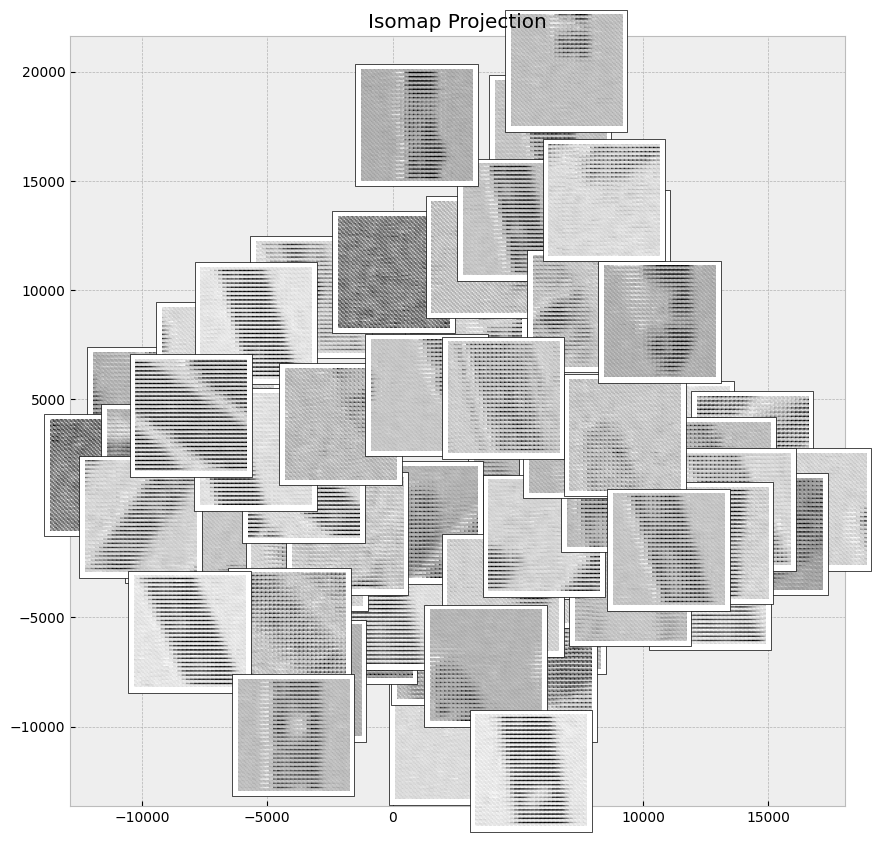

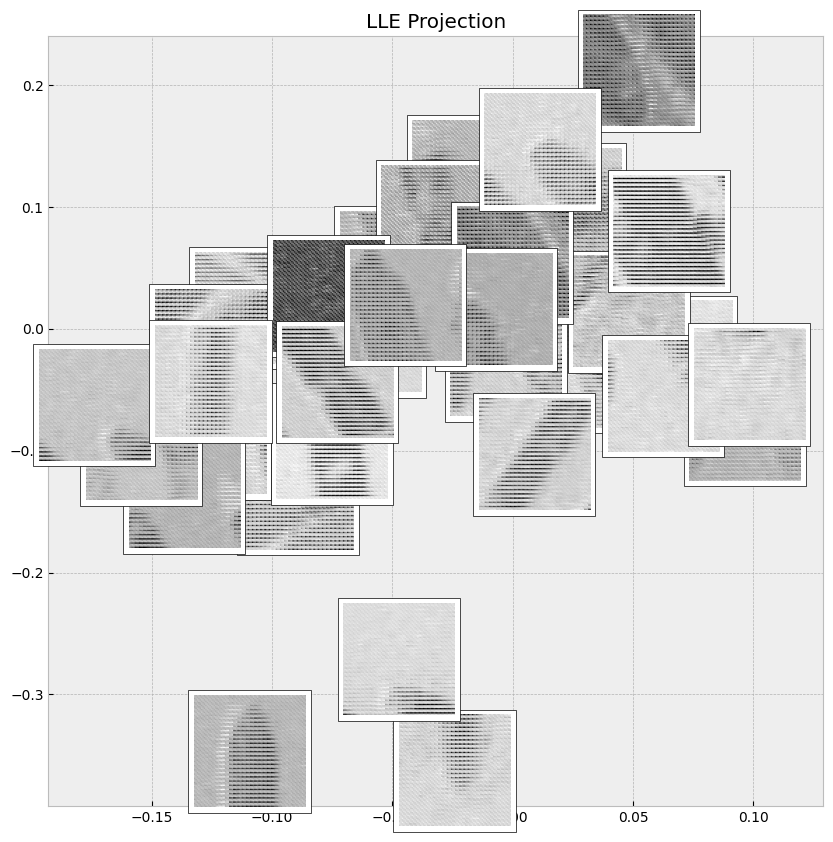

In [31]:
from sklearn.manifold import Isomap, LocallyLinearEmbedding
import matplotlib.pyplot as plt
import numpy as np

digit = 1  

data = X_flat[t_train == digit][::4]
images = data.reshape((-1, 80, 80))   

iso = Isomap(n_components=2)

fig, ax = plt.subplots(figsize=(10, 10))
plot_components(data, iso, images=images, ax=ax, thumb_frac=0.05, cmap='gray_r')
plt.title("Isomap Projection")
plt.show()

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=8)

fig, ax = plt.subplots(figsize=(10, 10))
plot_components(data, lle, images=images, ax=ax, thumb_frac=0.05, cmap='gray_r')
plt.title("LLE Projection")
plt.show()

## Summative Pipeline Evaluation

**Confusion Matrices**

In [33]:
import joblib
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

model_files = {
    "logIsomap" : "logIso.pkl",
    "logLLE"    : "logLLE.pkl",
    "logPCA"    : "logPCA.pkl",
    "svmIsomap" : "svmIso.pkl",
    "svmLLE"    : "svmLLE.pkl",
    "svmPCA"    : "svmPCA.pkl",
    "logReg"    : "logregModel.pkl",  
    "svmRaw"    : "svmModel.pkl",   
}


for name, path in model_files.items():
    print("\n======================================")
    print(f"Model: {name}")
    print("======================================")

    try:
        model = joblib.load(path)
    except:
        print(f"Could NOT load file: {path}")
        continue

    preds = model.predict(X_flat)

    cm = confusion_matrix(t_train, preds)
    print("Confusion Matrix:")
    print(cm)


Model: logIsomap
Confusion Matrix:
[[2233  153]
 [  88  726]]

Model: logLLE
Confusion Matrix:
[[2386    0]
 [ 814    0]]

Model: logPCA
Confusion Matrix:
[[2248  138]
 [  69  745]]

Model: svmIsomap
Confusion Matrix:
[[2300   86]
 [ 154  660]]

Model: svmLLE
Confusion Matrix:
[[2386    0]
 [ 814    0]]

Model: svmPCA
Confusion Matrix:
[[2320   66]
 [ 103  711]]

Model: logReg
Confusion Matrix:
[[2340   46]
 [  28  786]]

Model: svmRaw
Confusion Matrix:
[[2386    0]
 [   0  814]]


**Mislabeled Image Features**

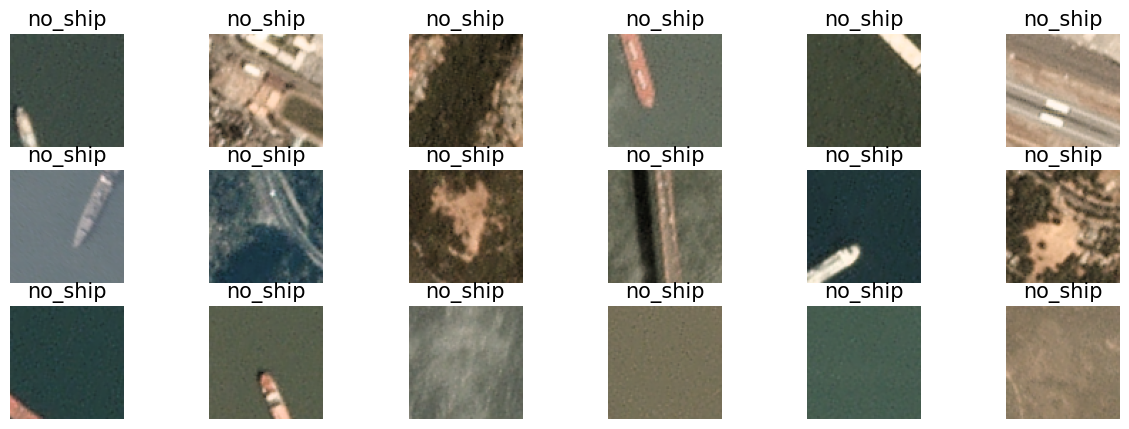

In [34]:
rnd_sample = npr.permutation(np.where(t==0)[0])
fig=plt.figure(figsize=(15,5))
for j in range(18):
    fig.add_subplot(3,6,j+1)
    plt.imshow(X[rnd_sample[j]])
    plt.axis('off');plt.title(label_names[t[rnd_sample[j]]],size=15)
plt.show()
print('\n\n')

Most of the ships misclassified as "not a ship" share a few similar traits. They tend to be low-contrast images where the ship blends into the surrounding water. Because of this, there are very few distinct features for the models to pick up on. Put simply, these images don't provide the clear structural cues, such as strong edges or visible waves, that the models learn to associate with the ship class.